In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/home/FRACTAL/ankush.raut/Downloads/Lecture assignments/Class 1 Module 2 data')

In [35]:
train = pd.read_csv('processed_train.csv')
test = pd.read_csv('processed_test.csv')
submission = pd.read_csv('sample_submission.csv')

In [36]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Corner,CulDSac,FR2,FR3,Inside,IR1,IR2,IR3,Reg
0,1,60,3,1.0,8450,1,2,1,1,0,5,2,2,5,7,5,2003,2003,1,1,12,13,2,1.0,2,3,5,3,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2,20,3,2.0,9600,1,2,1,1,0,24,1,2,2,6,8,1976,1976,1,1,8,8,1,2.0,1,3,2,3,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,60,3,3.0,11250,1,2,1,1,0,5,2,2,5,7,5,2001,2002,1,1,12,13,2,3.0,2,3,5,3,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,4,70,3,4.0,9550,1,2,1,1,0,6,2,2,5,7,5,1915,1970,1,1,13,15,1,4.0,1,3,1,2,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,5,60,3,5.0,14260,1,2,1,1,0,15,2,2,5,8,5,2000,2000,1,1,12,13,2,5.0,2,3,5,3,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [37]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Corner,CulDSac,FR2,FR3,Inside,IR1,IR2,IR3,Reg
0,1461,20,2.0,1461.0,11622,1,2,1,1.0,0,12,1,2,2,5,6,1961,1961,1,1,12,13,1,1.0,1,3,2,2,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1462,20,3.0,1462.0,14267,1,2,1,1.0,0,12,2,2,2,6,6,1958,1958,3,1,13,14,2,2.0,1,3,2,2,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,1,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1463,60,3.0,1463.0,13830,1,2,1,1.0,0,8,2,2,5,5,5,1997,1998,1,1,12,13,1,3.0,1,3,5,3,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,3,2010,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,1464,60,3.0,1464.0,9978,1,2,1,1.0,0,8,2,2,5,6,6,1998,1998,1,1,12,13,2,4.0,1,3,5,2,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,6,2010,1,0,0,0,0,0,0,0,0,1,1,0,0,0
4,1465,120,3.0,1465.0,5005,1,2,3,1.0,0,22,2,2,2,8,5,1992,1992,1,1,6,6,1,5.0,2,3,5,3,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [39]:
correlation_matrix = train.corr()

In [40]:
correlation_matrix.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Corner,CulDSac,FR2,FR3,Inside,IR1,IR2,IR3,Reg
Id,1.000000,0.011156,0.029329,1.000000,-0.033226,0.008916,-0.001530,0.003741,-0.013324,0.005847,-0.013735,-0.003815,0.001839,0.018111,-0.028365,0.012609,-0.012713,-0.021998,0.038675,-0.022562,-0.034694,-0.042847,0.001964,1.000000,0.005039,0.041433,-0.006660,-0.032631,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.017741,-0.022777,0.028174,-0.003186,0.019292,-0.054832,-0.003973,0.015804,0.017722,0.040852,-0.025725,-0.037611,0.042541,0.030748
MSSubClass,0.011156,1.000000,-0.211535,0.011156,-0.139781,-0.024969,-0.105995,-0.027856,0.022844,-0.025672,-0.005985,-0.024762,-0.042395,0.397161,0.032628,-0.059316,0.027850,0.040581,-0.117817,-0.031336,-0.089159,-0.137229,0.028615,0.011156,0.016178,-0.013197,0.060091,0.060184,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.817461,0.444511,0.150441,0.415159,0.524847,-0.063811,-0.044437,0.015217,0.044130,0.067828,-0.112626,-0.019392,-0.031221,0.122030
MSZoning,0.029329,-0.211535,1.000000,0.029329,0.140859,0.084606,0.221947,0.045657,-0.009400,0.006208,0.164969,0.075507,-0.031829,0.117615,0.269302,-0.146350,0.461917,0.241138,0.042379,0.027915,0.045382,0.048573,0.147058,0.029329,0.274595,0.131753,0.273506,0.243081,0.170059,0.035922,0.046960,0.237309,0.240465,-0.007883,-0.105732,0.160574,0.120119,0.025223,0.266772,0.168978,0.105903,-0.111713,0.121840,0.170517,0.253433,0.255667,0.125597,0.092446,-0.224789,0.032781,0.024213,0.024663,0.000786,-0.004702,0.010486,0.324610,0.168318,-0.120324,-0.000687,-0.136068,-0.081640,-0.004219,0.097694,0.031336,-0.030598,-0.058583,0.203456,0.050607,0.008938,-0.217661
LotFrontage,1.000000,0.011156,0.029329,1.000000,-0.033226,0.008916,-0.001530,0.003741,-0.013324,0.005847,-0.013735,-0.003815,0.001839,0.018111,-0.028365,0.012609,-0.012713,-0.021998,0.038675,-0.022562,-0.034694,-0.042847,0.001964,1.000000,0.005039,0.041433,-0.006660,-0.032631,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.017741,-0.022777,0.028174,-0.003186,0.019292,-0.054832,-0.003973,0.015804,0.017722,0.040852,-0.025725,-0.037611,0.042541,0.030748
LotArea,-0.033226,-0.139781,0.140859,-0.033226,1.000000,-0.197131,0.060105,0.183715,-0.010123,0.436868,0.044569,0.023846,0.022164,-0.033190,0.105806,-0.005636,0.014228,0.013788,0.077054,0.149837,0.004256,-0.003930,0.003673,-0.033226,0.055570,0.021107,-0.019335,0.076829,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.163554,0.077767,-0.015346,-0.141863,-0.167717,0.042722,0.179440,-0.002167,-0.009511,-0.132773,0.097235,0.225160,0.256526,-0.216111

In [41]:
corr = correlation_matrix.iloc[:10, :10]
corr.style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope
Id,1,0.0111565,0.0293291,1,-0.0332255,0.00891635,-0.00152982,0.00374148,-0.0133241,0.00584692
MSSubClass,0.0111565,1,-0.211535,0.0111565,-0.139781,-0.0249686,-0.105995,-0.0278559,0.0228438,-0.0256715
MSZoning,0.0293291,-0.211535,1,0.0293291,0.140859,0.0846061,0.221947,0.0456571,-0.00939983,0.00620837
LotFrontage,1,0.0111565,0.0293291,1,-0.0332255,0.00891635,-0.00152982,0.00374148,-0.0133241,0.00584692
LotArea,-0.0332255,-0.139781,0.140859,-0.0332255,1,-0.197131,0.0601052,0.183715,-0.0101232,0.436868
Street,0.00891635,-0.0249686,0.0846061,0.00891635,-0.197131,1,-0.0157202,-0.0166628,-0.00168177,-0.17936
Alley,-0.00152982,-0.105995,0.221947,-0.00152982,0.0601052,-0.0157202,1,0.0619338,-0.00640673,0.0300958
LandContour,0.00374148,-0.0278559,0.0456571,0.00374148,0.183715,-0.0166628,0.0619338,1,0.00291038,0.30028
Utilities,-0.0133241,0.0228438,-0.00939983,-0.0133241,-0.0101232,-0.00168177,-0.00640673,0.00291038,1,0.00590929
LandSlope,0.00584692,-0.0256715,0.00620837,0.00584692,0.436868,-0.17936,0.0300958,0.30028,0.00590929,1


In [42]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [43]:
train_uncorrelated = correlation(train.drop(columns = ['Id', 'SalePrice']), 0.8)
train_uncorrelated['Id'] = train['Id']
train_uncorrelated['SalePrice'] = train['SalePrice']

In [44]:
test_uncorrelated = test[list(train_uncorrelated.drop(columns = ['SalePrice']))]

In [45]:
print(train_uncorrelated.shape, test_uncorrelated.shape)

(1460, 65) (1459, 64)


In [56]:
from sklearn.model_selection import train_test_split, cross_val_score

In [57]:
training = train_uncorrelated.drop(columns = ['SalePrice'])
target = train_uncorrelated[['SalePrice']]

test = test_uncorrelated.drop(columns = ['Id'])
test_ids = test_uncorrelated[['Id']]

In [58]:
xtrain, xtest, ytrain, ytest = train_test_split(training, target, test_size = 0.2, random_state = 0)

In [59]:
xtrain_ids = xtrain[['Id']]
xtest_ids = xtest[['Id']]

xtrain = xtrain.drop(columns = ['Id'])
xtest = xtest.drop(columns = ['Id'])

## KNN Regression

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
knn_regressor = KNeighborsRegressor(n_neighbors=8, weights='uniform', algorithm='auto', 
                                    metric='euclidean', n_jobs=-1)
knn_regression = knn_regressor.fit(xtrain, ytrain)

In [87]:
knn_reg_cv_score = np.mean(cross_val_score(knn_regression, xtrain, ytrain, cv = 5))
print('KNN Regression cross validated score =', knn_reg_cv_score)

KNN Regression cross validated score = 0.6008506357559819


In [88]:
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
knn_predictions = knn_regression.predict(xtest)
knn_r2 = r2_score(ytest.SalePrice, knn_predictions)
knn_rmse = np.sqrt(mean_squared_error(ytest.SalePrice, knn_predictions))

print('KNN R^2 on hold out set =', knn_r2)
print('KNN rmse on hold out set =', knn_rmse)
print('Mean SalePrice =', np.mean(ytest.SalePrice))

KNN R^2 on hold out set = 0.5736127123683381
KNN rmse on hold out set = 54263.86122404754
Mean SalePrice = 181370.38356164383


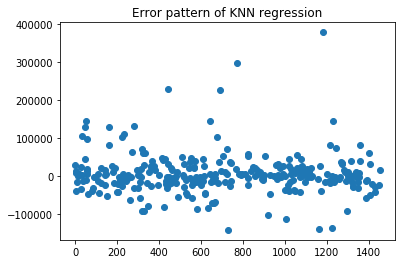

In [104]:
plt.title('Error pattern of KNN regression')
plt.scatter(xtest_ids, ytest - knn_predictions)
plt.show()

In [93]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

## Linear Regression

In [170]:
lm_regressor = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)
lm_regression = lm_regressor.fit(xtrain, ytrain)

In [171]:
lm_reg_cv_score = np.mean(cross_val_score(lm_regression, xtrain, ytrain, cv = 5))
print('Linear Regression cross validated score =', lm_reg_cv_score)

Linear Regression cross validated score = 0.8236043468234676


In [172]:
lm_predictions = lm_regression.predict(xtest)
lm_r2 = r2_score(ytest.SalePrice, lm_predictions)
lm_rmse = np.sqrt(mean_squared_error(ytest.SalePrice, lm_predictions))

print('Linear Regression R^2 on hold out set =', lm_r2)
print('Linear Regression rmse on hold out set =', lm_rmse)
print('Mean SalePrice =', np.mean(ytest.SalePrice))

Linear Regression R^2 on hold out set = 0.5891157257654652
Linear Regression rmse on hold out set = 53268.23772598633
Mean SalePrice = 181370.38356164383


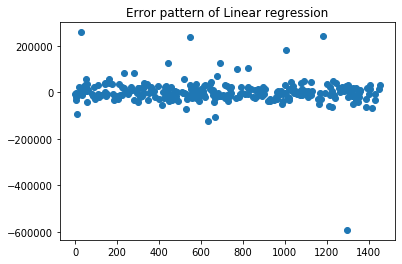

In [173]:
plt.title('Error pattern of Linear regression')
plt.scatter(xtest_ids, ytest - lm_predictions)
plt.show()

## Ridge Regression

In [202]:
ridge_regressor = Ridge(alpha=1, fit_intercept=True, normalize=True, copy_X=True, 
                        tol=0.001, solver='auto', random_state=1)
ridge_regression = ridge_regressor.fit(xtrain, ytrain)

In [203]:
ridge_reg_cv_score = np.mean(cross_val_score(ridge_regression, xtrain, ytrain, cv = 5))
print('Ridge Regression cross validated score =', ridge_reg_cv_score)

Ridge Regression cross validated score = 0.8044945640026983


In [204]:
ridge_predictions = ridge_regression.predict(xtest)
ridge_r2 = r2_score(ytest.SalePrice, ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(ytest.SalePrice, ridge_predictions))

print('Linear Regression R^2 on hold out set =', ridge_r2)
print('Linear Regression rmse on hold out set =', ridge_rmse)
print('Mean SalePrice =', np.mean(ytest.SalePrice))

Linear Regression R^2 on hold out set = 0.705933357153467
Linear Regression rmse on hold out set = 45064.177734830344
Mean SalePrice = 181370.38356164383


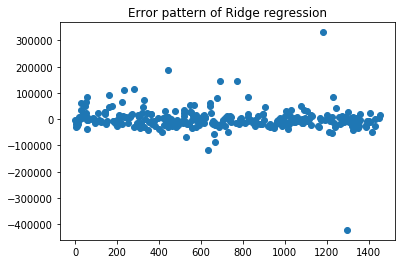

In [205]:
plt.title('Error pattern of Ridge regression')
plt.scatter(xtest_ids, ytest - ridge_predictions)
plt.show()

In [206]:
ridgecv_regressor = RidgeCV(alphas=(0.1, 1, 5, 10, 15, 50, 100), fit_intercept=True, normalize=True, cv=5)
ridgecv_regression = ridgecv_regressor.fit(xtrain, ytrain)

In [207]:
ridgecv_reg_cv_score = np.mean(cross_val_score(ridge_regression_cv, xtrain, ytrain, cv = 5))
print('RidgeCV Regression cross validated score =', ridgecv_reg_cv_score)

RidgeCV Regression cross validated score = 0.8277685123662988


In [229]:
ridgecv_predictions = ridgecv_regression.predict(xtest)
ridgecv_r2 = r2_score(ytest.SalePrice, ridgecv_predictions)
ridgecv_rmse = np.sqrt(mean_squared_error(ytest.SalePrice, ridgecv_predictions))

print('RidgeCV Regression R^2 on hold out set =', ridgecv_r2)
print('RidgeCV Regression rmse on hold out set =', ridgecv_rmse)
print('Mean SalePrice =', np.mean(ytest.SalePrice))

RidgeCV Regression R^2 on hold out set = 0.6371375977883919
RidgeCV Regression rmse on hold out set = 50058.69861723616
Mean SalePrice = 181370.38356164383


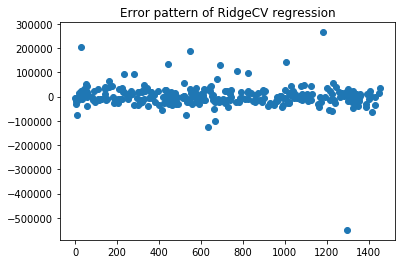

In [209]:
plt.title('Error pattern of RidgeCV regression')
plt.scatter(xtest_ids, ytest - ridgecv_predictions)
plt.show()

## Lasso Regression

In [216]:
lasso_regressor = Lasso(alpha=1.0, fit_intercept=True, normalize=True, copy_X=True, 
                        max_iter=1000, tol=0.0001, random_state=1)
lasso_regression = lasso_regressor.fit(xtrain, ytrain)

In [217]:
lasso_reg_cv_score = np.mean(cross_val_score(lasso_regression, xtrain, ytrain, cv = 5))
print('Lasso Regression cross validated score =', lasso_reg_cv_score)

Lasso Regression cross validated score = 0.8241928763926196


In [218]:
lasso_predictions = lasso_regression.predict(xtest)
lasso_r2 = r2_score(ytest.SalePrice, lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(ytest.SalePrice, lasso_predictions))

print('Lasso Regression R^2 on hold out set =', lasso_r2)
print('Lasso Regression rmse on hold out set =', lasso_rmse)
print('Mean SalePrice =', np.mean(ytest.SalePrice))

Lasso Regression R^2 on hold out set = 0.5920841127528427
Lasso Regression rmse on hold out set = 53075.473763898364
Mean SalePrice = 181370.38356164383


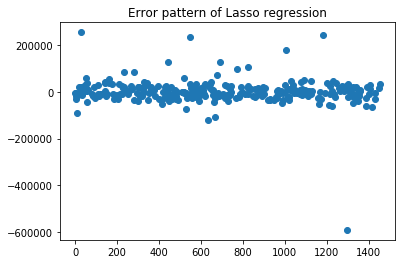

In [225]:
plt.title('Error pattern of Lasso regression')
plt.scatter(xtest_ids, ytest.SalePrice - lasso_predictions)
plt.show()

In [226]:
lassocv_regressor = LassoCV(eps=0.001, n_alphas=100, fit_intercept=True, 
                            normalize=True, tol=0.0001, copy_X=True, cv=5, n_jobs=-1)
lassocv_regression = lassocv_regressor.fit(xtrain, ytrain)

/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [227]:
lassocv_reg_cv_score = np.mean(cross_val_score(lassocv_regression, xtrain, ytrain, cv = 5))
print('LassoCV Regression cross validated score =', lassocv_reg_cv_score)

/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV Regression cross validated score = 0.8320096337221647


/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [228]:
lassocv_predictions = lassocv_regression.predict(xtest)
lassocv_r2 = r2_score(ytest.SalePrice, lassocv_predictions)
lassocv_rmse = np.sqrt(mean_squared_error(ytest.SalePrice, lassocv_predictions))

print('LassoCV Regression R^2 on hold out set =', lassocv_r2)
print('LassoCV Regression rmse on hold out set =', lassocv_rmse)
print('Mean SalePrice =', np.mean(ytest.SalePrice))

LassoCV Regression R^2 on hold out set = 0.6593327445960822
LassoCV Regression rmse on hold out set = 48503.57670799484
Mean SalePrice = 181370.38356164383


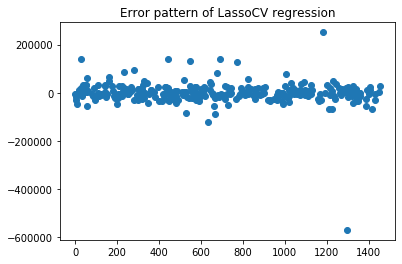

In [231]:
plt.title('Error pattern of LassoCV regression')
plt.scatter(xtest_ids, ytest.SalePrice - lassocv_predictions)
plt.show()

## Elastic Net

In [242]:
elasticnet_regressor = ElasticNet(alpha=0.001, l1_ratio=0.5, fit_intercept=True, 
                                  normalize=True, max_iter=1000, tol=0.0001,random_state=1)
elasticnet_regression = elasticnet_regressor.fit(xtrain, ytrain)

In [243]:
elasticnet_reg_cv_score = np.mean(cross_val_score(elasticnet_regression, xtrain, ytrain, cv = 5))
print('ElasticNet Regression cross validated score =', elasticnet_reg_cv_score)

ElasticNet Regression cross validated score = 0.8216123219592536


In [244]:
elasticnet_predictions = elasticnet_regression.predict(xtest)
elasticnet_r2 = r2_score(ytest.SalePrice, elasticnet_predictions)
elasticnet_rmse = np.sqrt(mean_squared_error(ytest.SalePrice, elasticnet_predictions))

print('ElasticNet Regression R^2 on hold out set =', elasticnet_r2)
print('ElasticNet Regression rmse on hold out set =', elasticnet_rmse)
print('Mean SalePrice =', np.mean(ytest.SalePrice))

ElasticNet Regression R^2 on hold out set = 0.6987534833959044
ElasticNet Regression rmse on hold out set = 45610.99917614821
Mean SalePrice = 181370.38356164383


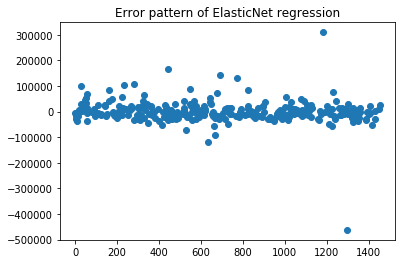

In [245]:
plt.title('Error pattern of ElasticNet regression')
plt.scatter(xtest_ids, ytest.SalePrice - elasticnet_predictions)
plt.show()

In [258]:
elasticnetcv_regressor = ElasticNetCV(l1_ratio=0.5, eps=0.001, alphas = (0.001,0.01, 0.5), fit_intercept=True, 
                                      normalize=True, max_iter=1000, tol=0.0001, cv=5, n_jobs=-1)
elasticnetcv_regression = elasticnetcv_regressor.fit(xtrain, ytrain)

/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [259]:
elasticnetcv_reg_cv_score = np.mean(cross_val_score(elasticnetcv_regression, xtrain, ytrain, cv = 5))
print('ElasticNetCV Regression cross validated score =', elasticnetcv_reg_cv_score)

ElasticNetCV Regression cross validated score = 0.8216123219592536


/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/FRACTAL/ankush.raut/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinat

In [260]:
elasticnetcv_predictions = elasticnetcv_regression.predict(xtest)
elasticnetcv_r2 = r2_score(ytest.SalePrice, elasticnetcv_predictions)
elasticnetcv_rmse = np.sqrt(mean_squared_error(ytest.SalePrice, elasticnetcv_predictions))

print('ElasticNetCV Regression R^2 on hold out set =', elasticnetcv_r2)
print('ElasticNetCV Regression rmse on hold out set =', elasticnetcv_rmse)
print('Mean SalePrice =', np.mean(ytest.SalePrice))

ElasticNetCV Regression R^2 on hold out set = 0.6987534833959044
ElasticNetCV Regression rmse on hold out set = 45610.99917614821
Mean SalePrice = 181370.38356164383


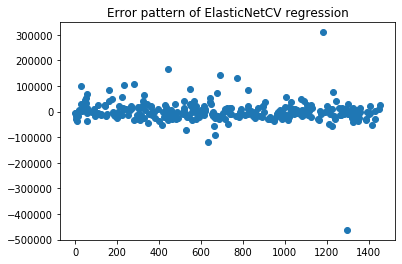

In [261]:
plt.title('Error pattern of ElasticNetCV regression')
plt.scatter(xtest_ids, ytest.SalePrice - elasticnetcv_predictions)
plt.show()

## PCA

In [262]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Corner,CulDSac,FR2,FR3,Inside,IR1,IR2,IR3,Reg
0,1,60,3,1.0,8450,1,2,1,1,0,5,2,2,5,7,5,2003,2003,1,1,12,13,2,1.0,2,3,5,3,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2,20,3,2.0,9600,1,2,1,1,0,24,1,2,2,6,8,1976,1976,1,1,8,8,1,2.0,1,3,2,3,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,60,3,3.0,11250,1,2,1,1,0,5,2,2,5,7,5,2001,2002,1,1,12,13,2,3.0,2,3,5,3,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,4,70,3,4.0,9550,1,2,1,1,0,6,2,2,5,7,5,1915,1970,1,1,13,15,1,4.0,1,3,1,2,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,5,60,3,5.0,14260,1,2,1,1,0,15,2,2,5,8,5,2000,2000,1,1,12,13,2,5.0,2,3,5,3,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [263]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Corner,CulDSac,FR2,FR3,Inside,IR1,IR2,IR3,Reg
0,20,2.0,1461.0,11622,1,2,1,1.0,0,12,1,2,2,5,6,1961,1961,1,1,12,1,1,3,2,2,468.0,144.0,270.0,882.0,0,0,896,0.0,0.0,1,0,2,1,0,1.0,140,0,0,0,120,0,0,6,2010,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,3.0,1462.0,14267,1,2,1,1.0,0,12,2,2,2,6,6,1958,1958,3,1,13,2,1,3,2,2,923.0,0.0,406.0,1329.0,0,0,1329,0.0,0.0,1,1,3,1,0,1.0,393,36,0,0,0,0,12500,6,2010,1,0,0,0,0,1,0,0,0,0,1,0,0,0
2,60,3.0,1463.0,13830,1,2,1,1.0,0,8,2,2,5,5,5,1997,1998,1,1,12,1,1,3,5,3,791.0,0.0,137.0,928.0,701,0,1629,0.0,0.0,2,1,3,1,1,2.0,212,34,0,0,0,0,0,3,2010,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,60,3.0,1464.0,9978,1,2,1,1.0,0,8,2,2,5,6,6,1998,1998,1,1,12,2,1,3,5,2,602.0,0.0,324.0,926.0,678,0,1604,0.0,0.0,2,1,3,1,1,2.0,360,36,0,0,0,0,0,6,2010,1,0,0,0,0,0,0,0,0,1,1,0,0,0
4,120,3.0,1465.0,5005,1,2,3,1.0,0,22,2,2,2,8,5,1992,1992,1,1,6,1,2,3,5,3,263.0,0.0,1017.0,1280.0,0,0,1280,0.0,0.0,2,0,2,1,0,2.0,0,82,0,0,144,0,0,1,2010,0,0,0,0,1,0,0,0,0,1,1,0,0,0
